# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
energy_df = pd.read_csv('energy_dataset.csv')
energy_df

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,Sunday,Yes,26.338718,52.580000,1563.567259,7,On,On,20.591717,70.270344
4996,12,17,Monday,No,20.007565,42.765607,1999.982252,5,Off,On,7.536319,73.943071
4997,12,13,Thursday,Yes,26.226253,30.015975,1999.982252,5,Off,On,28.162193,85.784613
4998,12,8,Saturday,Yes,24.673206,50.223939,1240.811298,2,On,On,20.918483,63.784001


In [3]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [4]:
energy_df.describe()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,6.251200,11.556000,24.946823,45.478146,1507.403201,4.576000,15.201195,76.794919
std,3.588687,6.888306,3.041678,8.972690,293.147209,2.906185,9.157038,9.231573
min,1.000000,0.000000,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,3.000000,6.000000,22.453790,38.111104,1253.906598,2.000000,7.477928,70.419588
50%,6.000000,11.000000,24.831846,45.793124,1513.581105,5.000000,15.343830,76.696267
75%,9.000000,18.000000,27.427281,52.696651,1754.846457,7.000000,22.889997,83.246274
max,12.000000,23.000000,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


Berdasarkan data tersebut variabel-variabel pada Energy Consumption Prediction Dataset adalah sebagai berikut:

- Month: Bulan (1-12)
- Hour: Jam (0-23)
- DayOfWeek: Hari dalam seminggu (Senin-Minggu)
- Holiday: Boolean liburan apa tidak (Yes-No)
- Temperature: Suhu lingkungan menggunakan celcius
- Humidity: Tingkat kelembapan lingkungan (%) dalam waktu tertentu
- SquareFootage: Luas bangunan atau lapangan (dalam satuan meter persegi)
- Occupancy: Jumlah orang dilokasi
- HVACUsage: Status sistem pendingin atau pemanas (On/Off).
- LightingUsage: Status penggunaan lampu (On/Off).
- RenewableEnergy: Energi yang dihasilkan dari sumber terbarukan (kWh).
- EnergyConsumption: Total konsumsi energi (kWh).

# Handle Outliers

<Axes: xlabel='SquareFootage'>

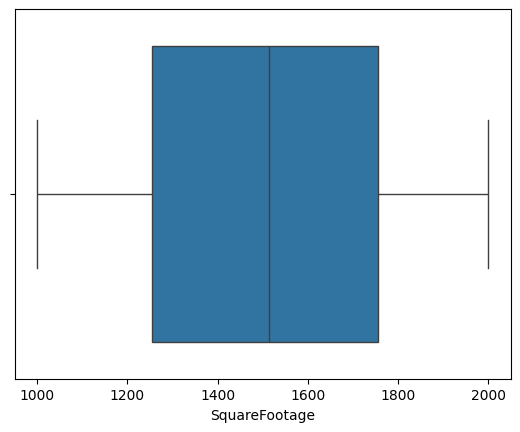

In [5]:
sns.boxplot(x=energy_df['SquareFootage'])

<Axes: xlabel='Temperature'>

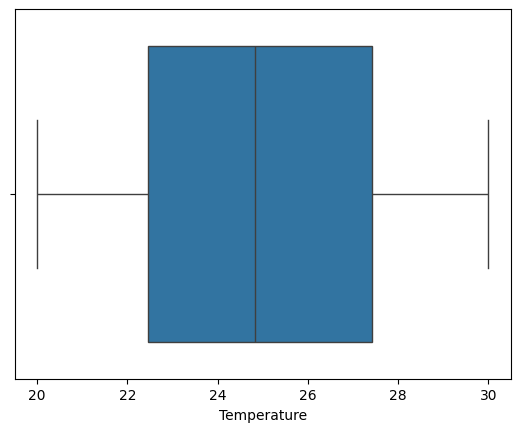

In [6]:
sns.boxplot(x=energy_df['Temperature'])

<Axes: xlabel='RenewableEnergy'>

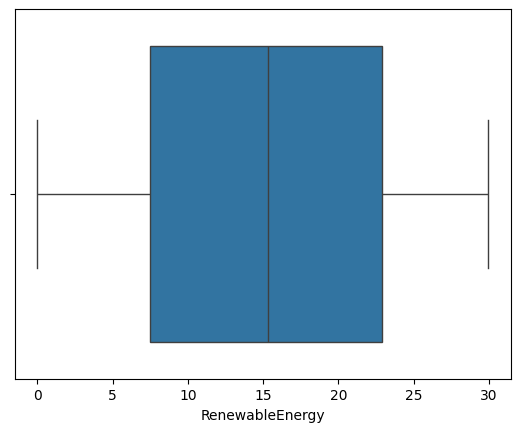

In [7]:
sns.boxplot(x=energy_df['RenewableEnergy'])

<Axes: xlabel='EnergyConsumption'>

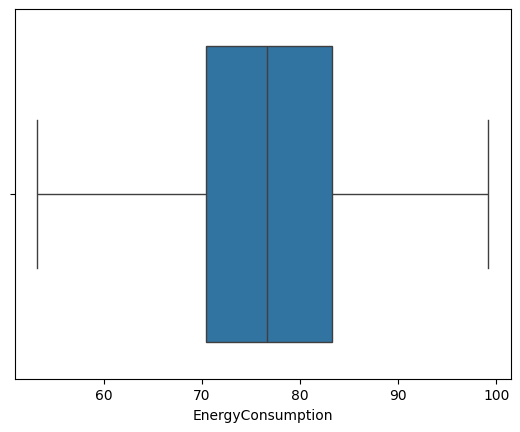

In [8]:
sns.boxplot(x=energy_df['EnergyConsumption'])

Setelah melakukan pengecekan ternyata tidak ada outlier pada dataset ini

# Exploratory Data Analysis - Univariate Analysis

In [9]:
numerical_feature = [
    'Month', 'Hour', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy', 'Energy Consumption'
    ]
categorical_feature = ['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage']

           Count  Percent
DayOfWeek                
Saturday     741     14.8
Friday       729     14.6
Thursday     719     14.4
Sunday       715     14.3
Wednesday    705     14.1
Tuesday      699     14.0
Monday       692     13.8


<Axes: title={'center': 'DayOfWeek'}, xlabel='DayOfWeek'>

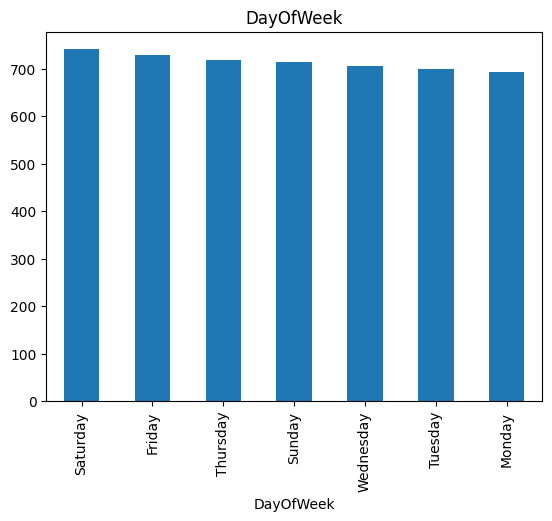

In [10]:
feature = categorical_feature[0]
count = energy_df[feature].value_counts()
percent = 100*energy_df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'Count':count, 'Percent':percent.round(1)})
print(count_percent)
count.plot(kind='bar', title=feature)

Terdapat 7 kategori yang mempresentasikan hari pada fitur DayOfWeek, dari data tersebut bisa disimpulkan bahwa datanya hampir merata dengan yang tertinggi pada hari sabtu yaitu 14.8% dan hari senin yang paling kecil datanya dengan presentase 13.8 persen.

         Count  Percent
Holiday                
No        2656     53.1
Yes       2344     46.9


<Axes: title={'center': 'Holiday'}, xlabel='Holiday'>

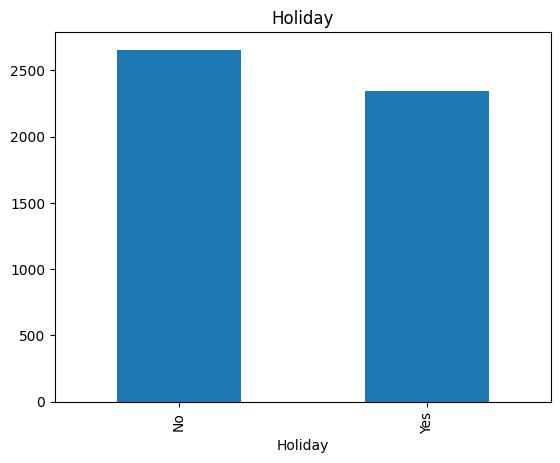

In [11]:
feature = categorical_feature[1]
count = energy_df[feature].value_counts()
percent = 100*energy_df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'Count':count, 'Percent':percent.round(1)})
print(count_percent)
count.plot(kind='bar', title=feature)

Fitur holiday atau liburan memiliki sebaran data yang hampir seimbang, No memiliki presentase data sebesar 53.1% dan Yes memiliki presentase data sebesar 46.9%.

           Count  Percent
HVACUsage                
On          2500     50.0
Off         2500     50.0


<Axes: title={'center': 'HVACUsage'}, xlabel='HVACUsage'>

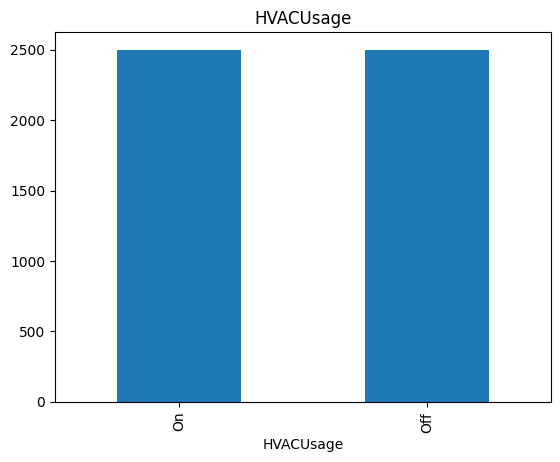

In [12]:
feature = categorical_feature[2]
count = energy_df[feature].value_counts()
percent = 100*energy_df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'Count':count, 'Percent':percent.round(1)})
print(count_percent)
count.plot(kind='bar', title=feature)

Pada grafik diatas HVACUsage atau status sistem pendingin datanya seimbang memiliki masing masing 50% data.

               Count  Percent
LightingUsage                
Off             2543     50.9
On              2457     49.1


<Axes: title={'center': 'LightingUsage'}, xlabel='LightingUsage'>

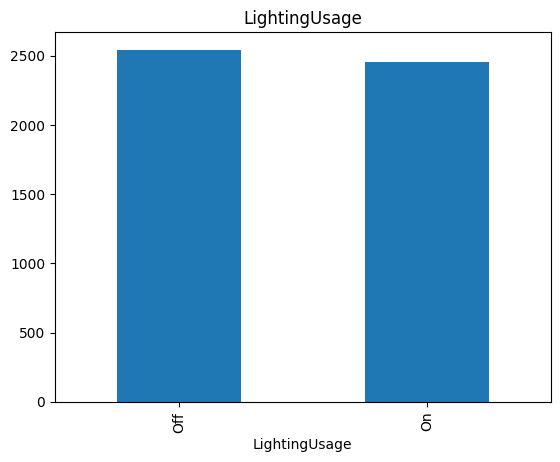

In [13]:
feature = categorical_feature[3]
count = energy_df[feature].value_counts()
percent = 100*energy_df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'Count':count, 'Percent':percent.round(1)})
print(count_percent)
count.plot(kind='bar', title=feature)

Fitur LightningUsage yaitu penggunaan lampu nyala atau tidak juga memiliki sebaran data yang hampir seimbang, Off memiliki presentase data sebesar 50.9% dan On memiliki presentase data sebesar 49.1%.

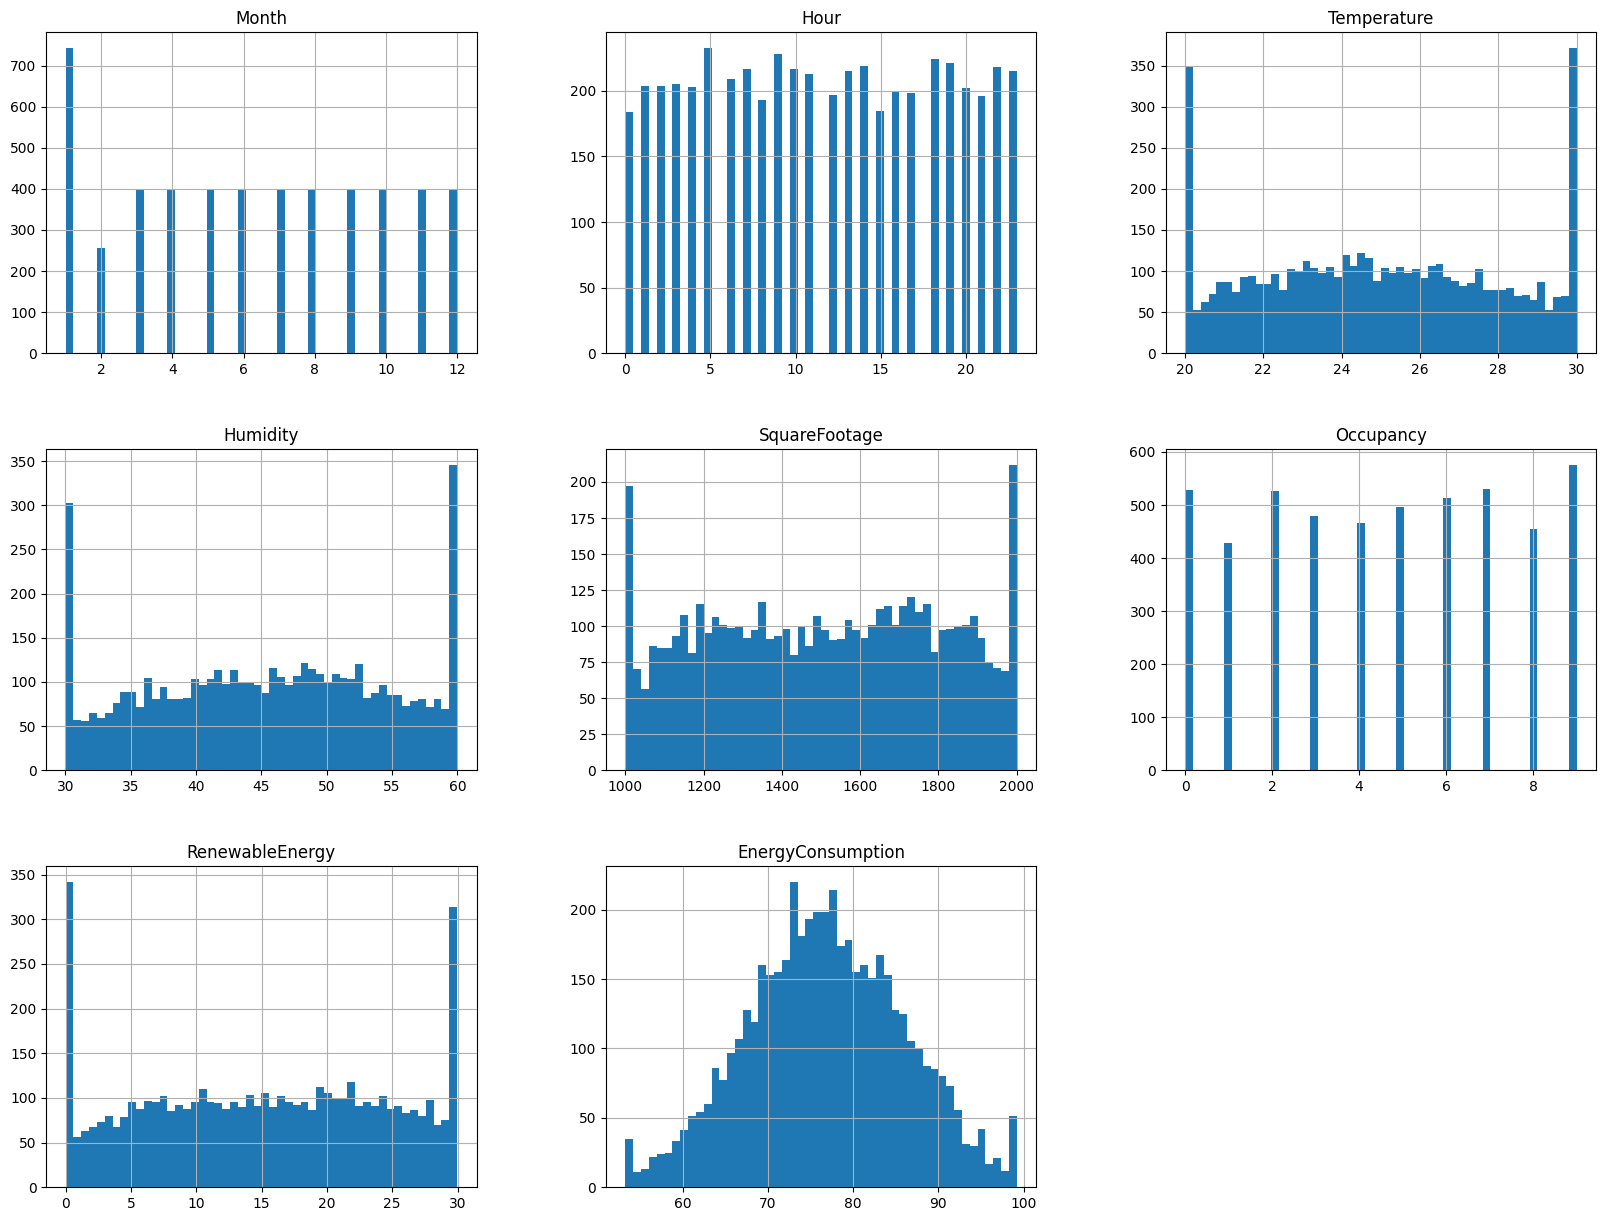

In [14]:
energy_df.hist(bins=50, figsize=(20,15))
plt.show()

Dilihat dari histogram variabel 'EnergyConsumption', yang merupakan target fitur (label) pada data. Bisa diperoleh beberapa informasi yaitu:
- Rentang penggunaan energi yaitu 53-100, menunjukkan konsumsi energi dalam batas wajar
- Distribusi datanya adalah simetris, memiliki distribusi yang seimbang disekitar pusatnya.

# Exploratory Data Analysis - Multivariate Analysis

<ipython-input-15-ef4ec0ad7bff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='EnergyConsumption', kind='bar', height=4, aspect=3, data=energy_df, palette='Set3')


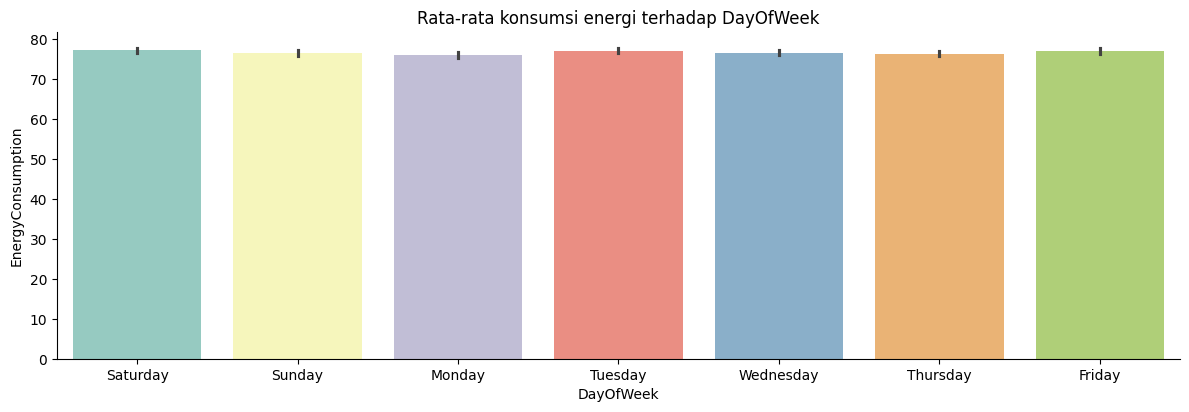

<ipython-input-15-ef4ec0ad7bff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='EnergyConsumption', kind='bar', height=4, aspect=3, data=energy_df, palette='Set3')


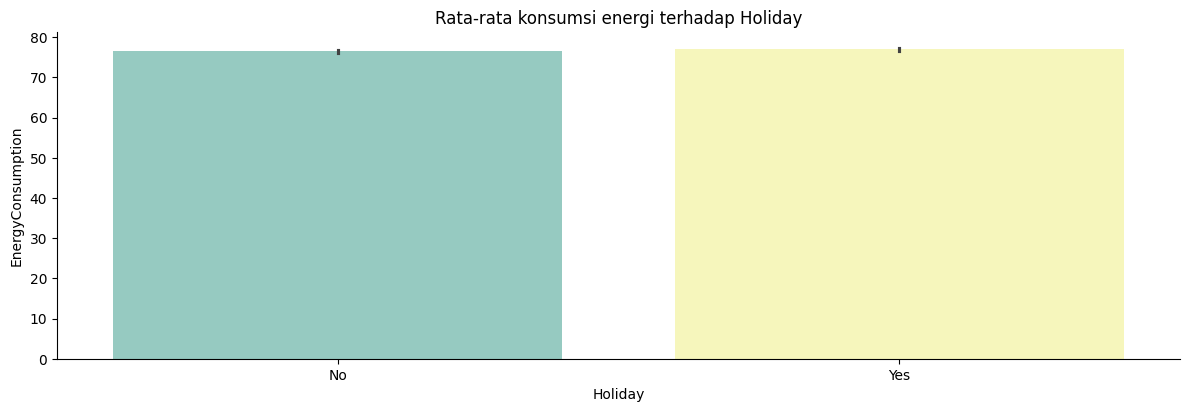

<ipython-input-15-ef4ec0ad7bff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='EnergyConsumption', kind='bar', height=4, aspect=3, data=energy_df, palette='Set3')


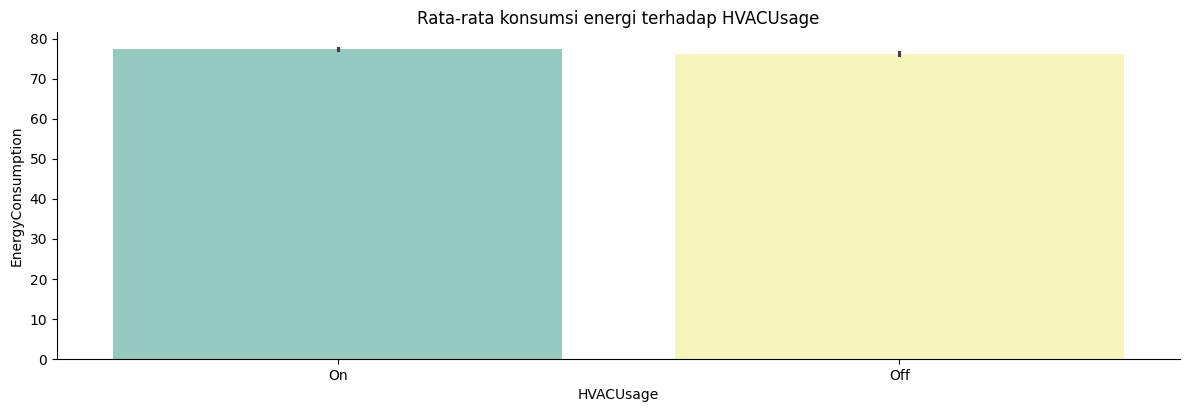

<ipython-input-15-ef4ec0ad7bff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y='EnergyConsumption', kind='bar', height=4, aspect=3, data=energy_df, palette='Set3')


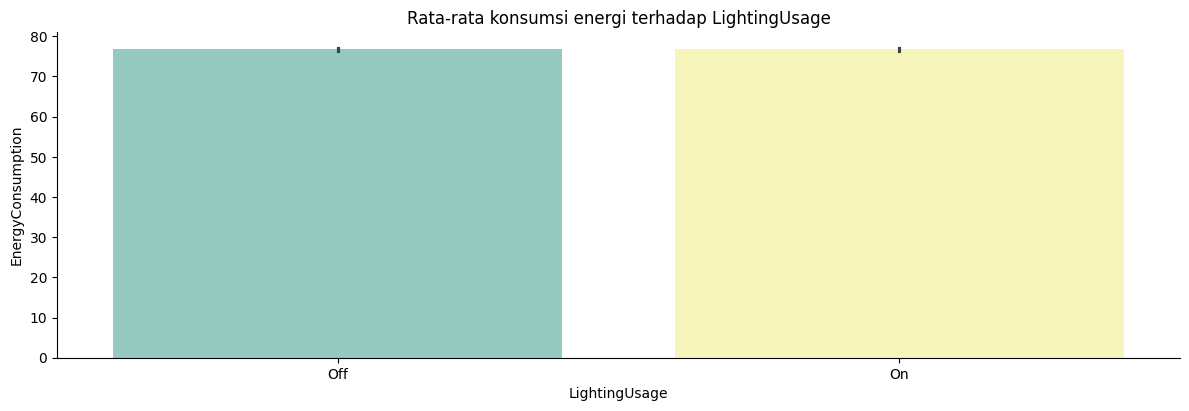

In [15]:
cat_features = energy_df.select_dtypes(include=['object']).columns.tolist()

for col in cat_features:
    sns.catplot(x=col, y='EnergyConsumption', kind='bar', height=4, aspect=3, data=energy_df, palette='Set3')
    plt.title(f'Rata-rata konsumsi energi terhadap {col}')
    plt.show()

Berdasarkan rata rata konsumsi energi terhadap fitur kategori memberikan beberapa informasi, berikut analisisnya:
- Rentang rata-rata yang sempit mengindikasikan bahwa konsumsi energi relatif stabil meskipun ada perubahan kategori pada variabel 'DayOfWeek', 'Holiday', 'HVACUsage', atau 'LightningUsage'.
- Faktor-faktor tersebut tidak memiliki pengaruh yang signifikan terhadap rata-rata konsumsi energi.

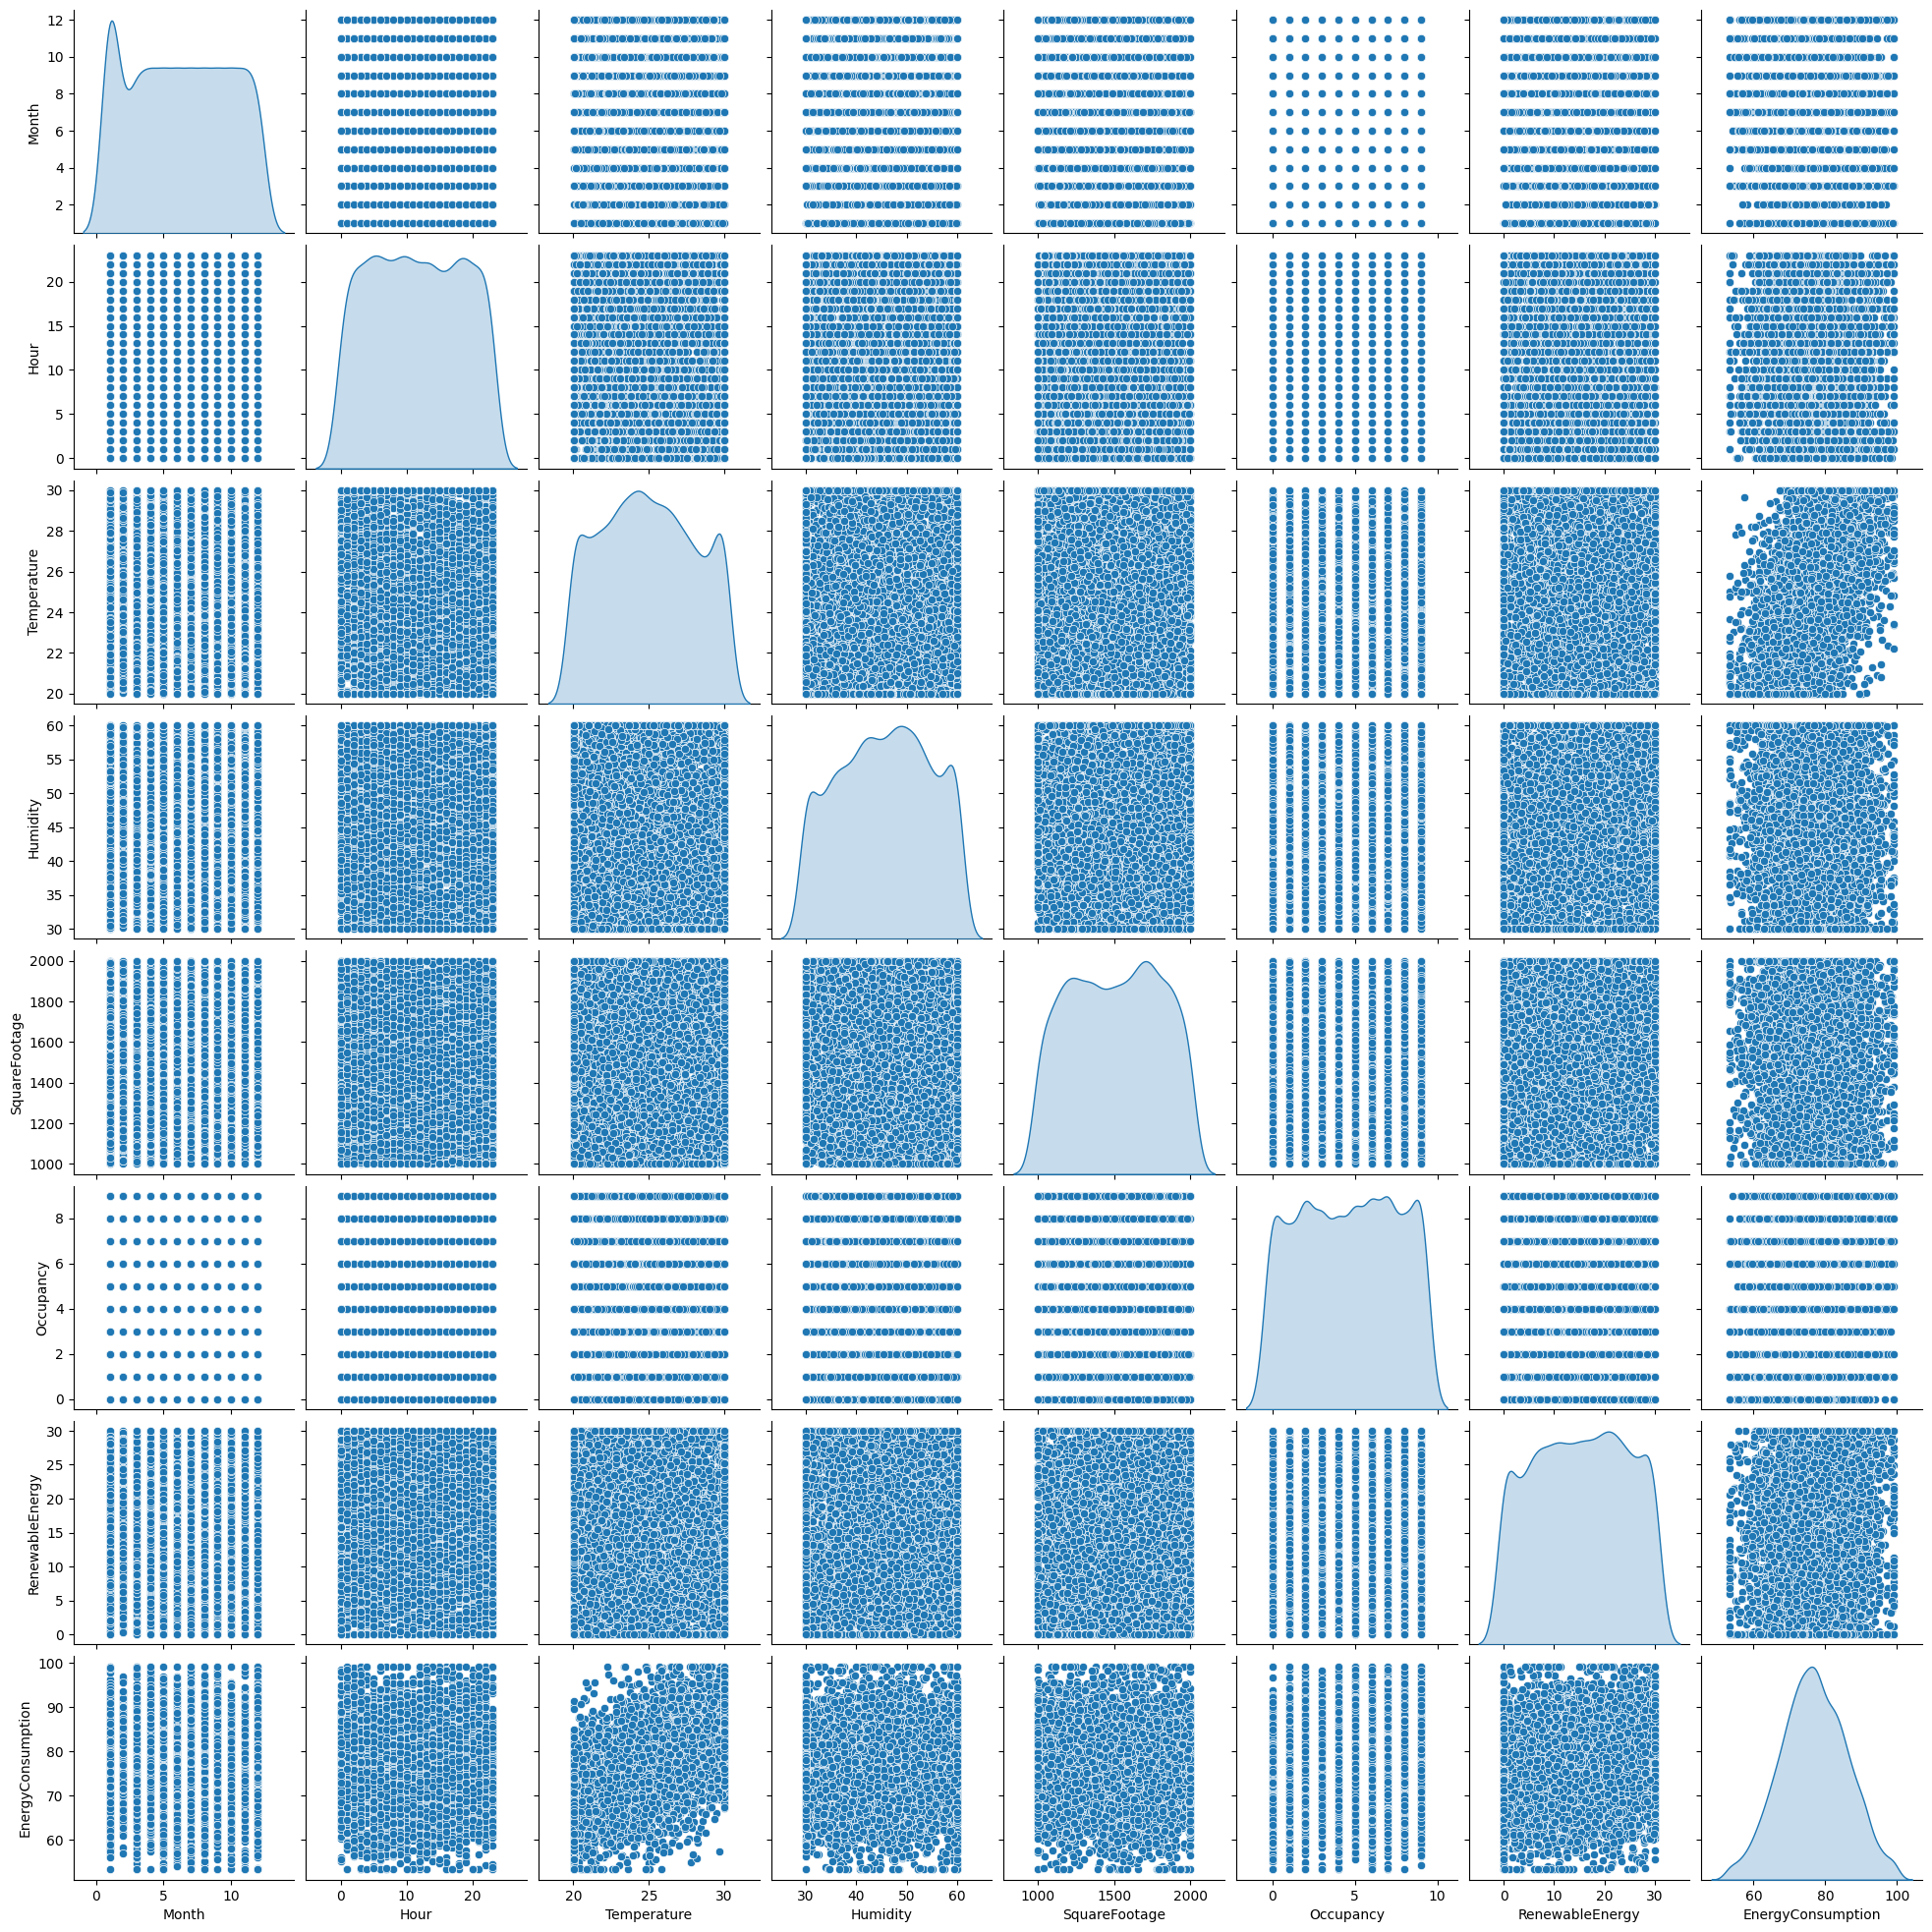

In [16]:
sns.pairplot(energy_df, diag_kind='kde')
plt.show()

Berdasarkan scatter plot, hanya Temperature saja yang terlihat berhubungan dengan EnergyConsumption secara visual. Hubungan lain seperti Humidity, SquareFootage, Hour, RenewableEnergy terlihat lemah.

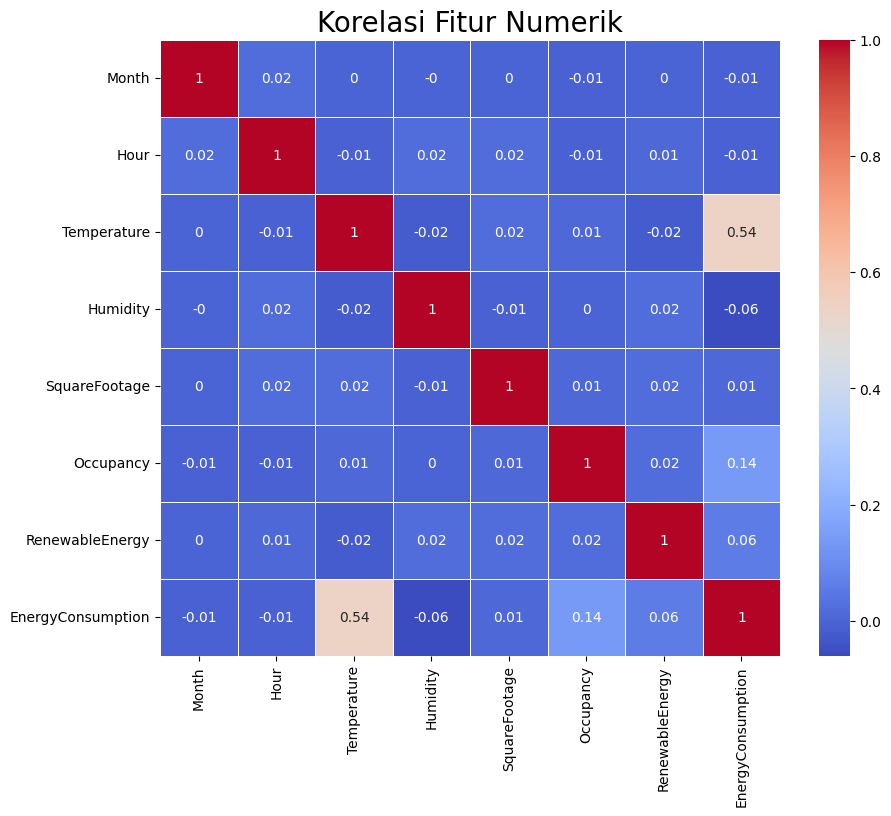

In [17]:
numeric_features = energy_df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(10, 8))
correlation_matrix = energy_df[numeric_features].corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Fitur Numerik', size=20)
plt.show()

Jika diamati, fitur 'Temperature' satu satunya yang berkolerasi dengan 'EnergyConsumption' (bernilai 0.54). Karena sebagian fitur memiliki korelasi rendah dengan target model yang berbasis linear regression mungkin akan tidak optimal.

# Data Preparation

Pada bagian ini akan dilakukan empat tahap persiapan data, yaitu:

- Encoding fitur kategori menggunakan LabelEncoder.
- Pembagian dataset dengan fungsi train_test_split.
- Standarisasi.

Untuk melakukan proses encoding fitur kategori dalam studi kasus ini menggunakan LabelEncoder dari library scikt-learn. Label Encoder menghasilkan representasi numerik sederhana dari data kategori (misalnya, "Monday" menjadi 0, "Tuesday" menjadi 1).

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for feature in categorical_feature:
    label_encoder = LabelEncoder()
    energy_df[feature] = label_encoder.fit_transform(energy_df[feature])
    label_encoders[feature] = label_encoder

energy_df.head(5)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,2,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,75.364373
1,1,1,2,0,27.731651,54.225919,1411.064918,1,1,1,21.831384,83.401855
2,1,2,2,0,28.704277,58.907658,1755.715009,2,0,0,6.764672,78.270888
3,1,3,2,0,20.080469,50.371637,1452.316318,1,0,1,8.623447,56.519850
4,1,4,2,0,23.097359,51.401421,1094.130359,9,1,0,3.071969,70.811732


Setelah melakukan encoding data selanjutnya adalah membagi data menjadi data train dan data test dengan perbandingan 80% untuk train dan 20% untuk test menggunakan train_test_split dari library scikit-learn.

In [19]:
from sklearn.model_selection import train_test_split

X = energy_df.drop('EnergyConsumption', axis=1)
y = energy_df['EnergyConsumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(f'Dimensi X_train: {X_train.shape}')
print(f'Dimensi X_test: {X_test.shape}')

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Dimensi X_train: (4000, 11)
Dimensi X_test: (1000, 11)
Total # of sample in whole dataset: 5000
Total # of sample in train dataset: 4000
Total # of sample in test dataset: 1000


Standarisasi dengan menggunakan StandardScaler pada data dan mengubah nilai rata-rata(mean) menjadi 0 dan nilai standar deviasi menjadi 1.

In [21]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Month', 'Hour', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy']

scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_train[numerical_features].head()

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy
4227,1.325680,-0.224012,0.160803,0.799355,-1.432891,0.149658,-0.809228
4676,1.605803,0.645937,-0.792568,1.103650,-0.217463,-0.194582,-0.121394
800,-1.195423,-0.513995,0.189688,-1.160843,0.089780,1.182378,-1.255755
3671,0.765435,1.660878,-1.569113,0.609024,-0.428260,-0.194582,-0.418510
4193,1.045557,0.065971,-1.626020,1.061029,1.446883,0.493898,0.151566


In [22]:
X_train[numerical_features].describe().round(4)

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy
count,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-1.4755,-1.6739,-1.6349,-1.7291,-1.7369,-1.5715,-1.6763
25%,-0.9153,-0.8040,-0.8187,-0.8171,-0.8703,-0.8831,-0.8393
50%,-0.0749,-0.0790,-0.0218,0.0311,0.0212,0.1497,0.0164
75%,0.7654,0.9359,0.8123,0.8021,0.8496,0.8381,0.8498
max,1.6058,1.6609,1.6444,1.6182,1.6738,1.5266,1.6023


# Pembuatan Model

Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif).

In [23]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'Random Forest', 'ADABoost'])

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

models.loc['train_mse', 'KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true = y_train)

Algoritma kedua adalah Random Forest, Random Forest (RF) adalah algoritma yang dapat meningkatkan hasil akurasi dalam membangkitkan atribut untuk setiap node yang dilakukan secara acak. Random forest merupakan salah satu model machine learning yang terdiri dari beberapa model dan bekerja secara bersama-sama.

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, max_depth=16, n_jobs=-1, random_state=55)
rf.fit(X_train, y_train)

models.loc['train_mse', 'Random Forest'] = mean_squared_error(y_pred = rf.predict(X_train), y_true = y_train)

Algoritma ketiga adalah Boosting, algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner).

In [26]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(learning_rate=0.05, random_state=55)
adaboost.fit(X_train, y_train)

models.loc['train_mse', 'ADABoost'] = mean_squared_error(y_pred = adaboost.predict(X_train), y_true = y_train)

# Evaluasi Model

In [30]:
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

mse = pd.DataFrame(columns=['Train', 'Test'], index=['KNN', 'Random Forest', 'ADABoost'])
model_dict = {'KNN': knn, 'Random Forest': rf, 'ADABoost': adaboost}

for name, model in model_dict.items():
  mse.loc[name, 'Train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'Test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,Train,Test
KNN,0.047223,0.205529
Random Forest,0.010006,0.155376
ADABoost,0.057788,0.13968


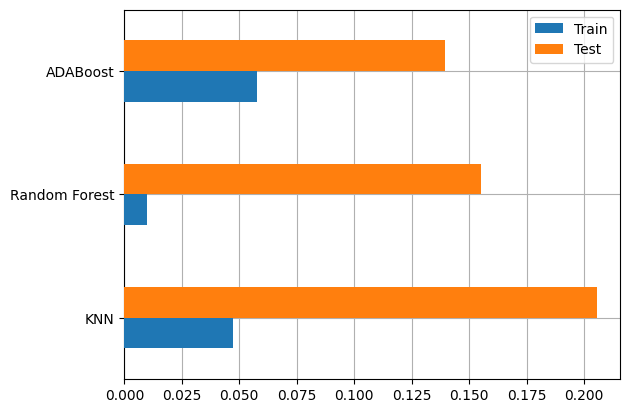

In [31]:
fig, ax = plt.subplots()
mse.sort_values(by='Test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Model Boosting memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma KNN memiliki eror yang paling besar. Model Boosting yang dipilih sebagai model terbaik untuk melakukan prediksi energy consumption.

In [32]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_Random Forest,prediksi_ADABoost
1501,84.778571,64.3,67.6,69.1
